# RQ2 : What factors impact draft/trade strategies the most?

With this research question we aim to investigate the key factors that have an impact on draft/trade strategies using a comprehensive data-driven approach. By using player statistics, team performance metrics, past draft outcomes, and college statistics scraped from the nba site (using the `nba_api`), we seek to provide actionable insights and recommendations for improving draft/trade decisions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [3]:
sns.set_context('talk', font_scale=0.9)

##### Lets first load the datasets

In [4]:
player_stats = pd.read_csv('../data/cleaned/players_data/player_stats.csv')
team_stats = pd.read_csv('../data/cleaned/team_regSeason_data/team_regSeason_stats.csv')
draft_data = pd.read_csv('../data/cleaned/draft_data/draft_data.csv')
college_stats = pd.read_csv('../data/cleaned/player_college_data/player_college_stats.csv')

In [5]:
draft_data

,player_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_nickname,...,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,modified_lane_agility_time,three_quarter_sprint,bench_press
0,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,...,103.5,8' 7.50'',NaN,8.50,8.50,NaN,NaN,NaN,NaN,NaN
1,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,...,104.0,8' 8.00'',NaN,8.75,9.25,NaN,NaN,NaN,NaN,NaN
2,1641710,Anthony Black,2023,1,6,6,Draft,1610612753,Orlando,Magic,...,102.5,8' 6.50'',NaN,8.25,9.50,32.0,39.0,NaN,3.35,NaN
3,1641716,Jarace Walker,2023,1,8,8,Draft,1610612764,Washington,Wizards,...,104.5,8' 8.50'',NaN,9.00,10.00,34.5,38.0,NaN,3.20,NaN
4,1641707,Taylor Hendricks,2023,1,9,9,Draft,1610612762,Utah,Jazz,...,107.0,8' 11.00'',NaN,9.25,10.25,32.5,36.0,NaN,3.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2081,Ernest Brown,2000,2,23,52,Draft,1610612748,Miami,Heat,...,109.5,9' 1.5'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
922,2082,Dan McClintock,2000,2,24,53,Draft,1610612743,Denver,Nuggets,...,107.0,8' 11'',NaN,NaN,NaN,33.0,35.0,NaN,3.33,20.0
923,2083,Cory Hightower,2000,2,25,54,Draft,1610612759,San Antonio,Spurs,...,101.5,8' 5.5'',NaN,NaN,NaN,29.5,34.5,NaN,3.37,0.0
924,2084,Chris Porter,2000,2,26,55,Draft,1610612744,Golden State,Warriors,...,103.5,8' 7.5'',NaN,NaN,NaN,28.5,35.0,NaN,3.20,6.0


Since we only have drafts from 2000 onwards, we will analyse stats from every dataset in the same time frame :

In [6]:
player_stats = player_stats[player_stats['season'] >= '2000']
player_stats.head(10)

,player_id,player_name,team_id,team_name,team_abbr,season,league_id,age,games_played,games_started,...,free_throw_pct,offensive_rebounds,defensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
16,920,A.C. Green,1610612748,Miami Heat,MIA,2000-01,0,37.0,82,1.0,...,0.712,107.0,206.0,313.0,39,30.0,8.0,45.0,119,367
20,2062,A.J. Guyton,1610612741,Chicago Bulls,CHI,2000-01,0,23.0,33,8.0,...,0.833,10.0,26.0,36.0,64,9.0,5.0,24.0,35,198
21,2062,A.J. Guyton,1610612741,Chicago Bulls,CHI,2001-02,0,24.0,45,6.0,...,0.815,12.0,32.0,44.0,81,10.0,7.0,37.0,23,244
22,2062,A.J. Guyton,1610612744,Golden State Warriors,GSW,2002-03,0,25.0,2,0.0,...,0.000,0.0,0.0,0.0,2,1.0,0.0,1.0,0,0
23,1630639,A.J. Lawson,1610612750,Minnesota Timberwolves,MIN,2022-23,0,22.0,1,0.0,...,0.000,0.0,1.0,1.0,0,0.0,0.0,0.0,1,2
24,1630639,A.J. Lawson,1610612742,Dallas Mavericks,DAL,2022-23,0,22.0,14,0.0,...,0.250,6.0,14.0,20.0,2,2.0,0.0,3.0,10,54
25,1630639,A.J. Lawson,1610612742,Dallas Mavericks,DAL,2023-24,0,23.0,35,0.0,...,0.619,12.0,23.0,35.0,14,10.0,3.0,10.0,20,120
27,201166,Aaron Brooks,1610612745,Houston Rockets,HOU,2007-08,0,23.0,51,0.0,...,0.857,13.0,43.0,56.0,87,13.0,5.0,44.0,69,264
28,201166,Aaron Brooks,1610612745,Houston Rockets,HOU,2008-09,0,24.0,80,35.0,...,0.866,33.0,124.0,157.0,238,46.0,8.0,125.0,152,894
29,201166,Aaron Brooks,1610612745,Houston Rockets,HOU,2009-10,0,25.0,82,82.0,...,0.822,54.0,161.0,215.0,434,69.0,14.0,232.0,199,1604


Similarly lets do the same for `teams_stats` and `college stats` :

In [7]:
team_stats = team_stats[team_stats['season'] >= '2000']
team_stats.head(10)

,team_id,team_name,team_city,team_nickname,season,games_played,wins,losses,win_pct,conference_rank,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,personal_fouls,steals,turnovers,blocks,points,points_rank
51,1610612737,Atlanta Hawks,Atlanta,Hawks,2000-01,82,25,57,0.305,13,...,1028,2490,3518,1559,1863,634,1368,387,7459,26
52,1610612737,Atlanta Hawks,Atlanta,Hawks,2001-02,82,33,49,0.402,12,...,955,2445,3400,1656,1702,667,1275,350,7711,19
53,1610612737,Atlanta Hawks,Atlanta,Hawks,2002-03,82,35,47,0.427,11,...,937,2558,3495,1679,1783,611,1367,473,7714,18
54,1610612737,Atlanta Hawks,Atlanta,Hawks,2003-04,82,28,54,0.341,12,...,996,2507,3503,1648,1826,627,1350,408,7611,15
55,1610612737,Atlanta Hawks,Atlanta,Hawks,2004-05,82,13,69,0.159,15,...,1100,2335,3435,1614,2009,629,1319,344,7605,28
56,1610612737,Atlanta Hawks,Atlanta,Hawks,2005-06,82,26,56,0.317,14,...,1069,2232,3301,1625,2054,587,1284,394,7972,16
57,1610612737,Atlanta Hawks,Atlanta,Hawks,2006-07,82,30,52,0.366,13,...,976,2312,3288,1573,1970,609,1306,446,7680,30
58,1610612737,Atlanta Hawks,Atlanta,Hawks,2007-08,82,37,45,0.451,8,...,1008,2454,3462,1804,1673,600,1223,448,8054,15
59,1610612737,Atlanta Hawks,Atlanta,Hawks,2008-09,82,47,35,0.573,4,...,870,2412,3282,1657,1610,603,1048,376,8046,19
60,1610612737,Atlanta Hawks,Atlanta,Hawks,2009-10,82,53,29,0.646,3,...,969,2451,3420,1789,1632,592,980,413,8338,13


In [8]:
college_stats.columns

Index(['player_id', 'player_name', 'college', 'games_played', 'minutes_played',
       'field_goals_made', 'field_goals_attempted', 'field_goal_pct',
       'three_pointers_made', 'three_pointers_attempted', 'three_point_pct',
       'free_throws_made', 'free_throws_attempted', 'free_throw_pct',
       'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 'assists',
       'steals', 'blocks', 'turnovers', 'personal_fouls', 'points'],
      dtype='object')

We dont have the years for college stats of every player. However, we can use `player_id` from the draft data to fetch stats of a particular player during college (i.e. before they were drafted into the NBA) 

Before diving deep into the analysis, it'll be interesting to see which colleges are players drafted from the most. Lets visualise this :

In [9]:
draft_data.groupby('organization_type')['organization_type'].count()

organization_type
College/University    861
High School            19
Other Team/Club        46
Name: organization_type, dtype: int64

This dataset contains 3 different types of organisations. However, for the purpose of our analysis we will only look at 'College/University' since most players are drafted from colleges :

In [10]:
drafted_from_college = draft_data[draft_data['organization_type'] == 'College/University']

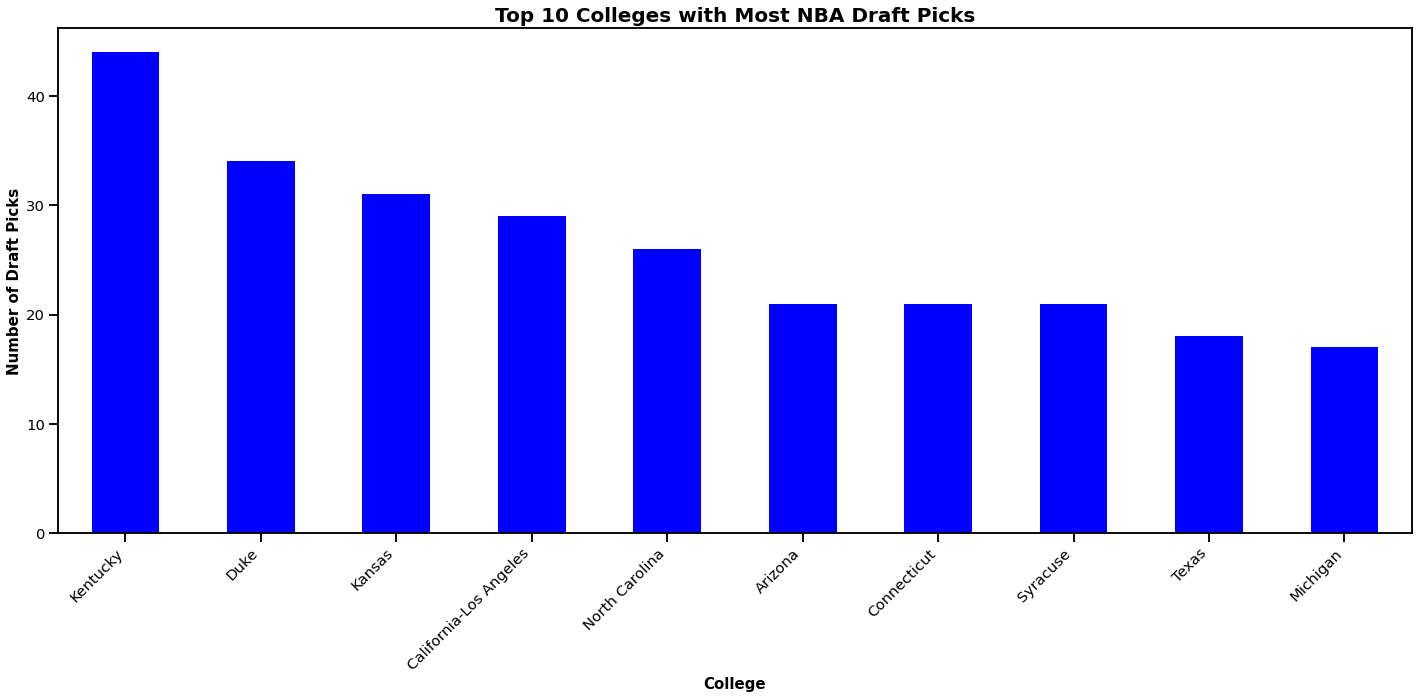

In [11]:
top_10_colleges = drafted_from_college['organization'].value_counts().nlargest(10)


plt.figure(figsize=(20, 10))
top_10_colleges.plot(kind='bar', color='blue')
plt.title('Top 10 Colleges with Most NBA Draft Picks', fontsize=20, fontweight='bold')
plt.xlabel('College', fontsize=15, fontweight='bold')
plt.ylabel('Number of Draft Picks', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see Kentucky has had the most drafts in total (2000-2023) followed by Duke and Kansas. However, this doesnt show us the year on year trend in draft picks from colleges where we might see a pattern.

Lets visualise this further to see which college had the most draft pics in every year (from 2000) :

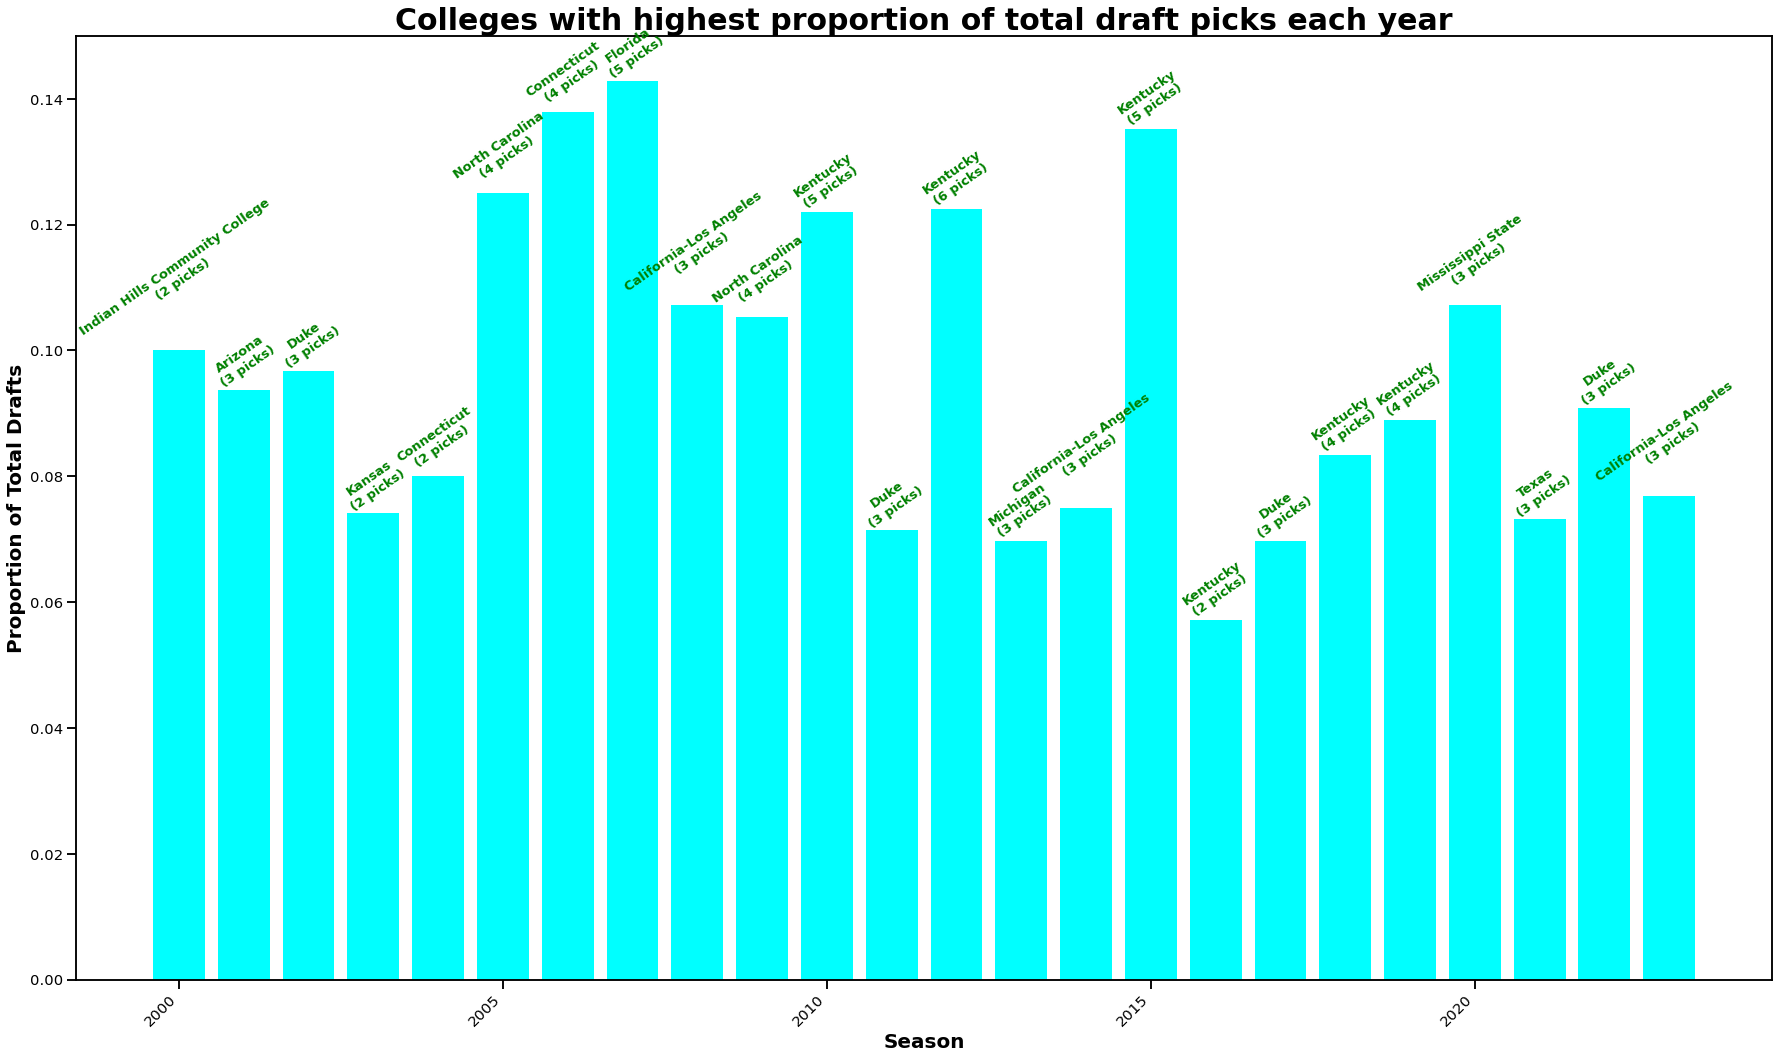

In [12]:
drafts_per_college_per_year = drafted_from_college.groupby(['season', 'organization']).size().reset_index(name='draft_count')

# Finding the college with the most draft picks for each year
top_college_each_year = drafts_per_college_per_year.loc[drafts_per_college_per_year.groupby('season')['draft_count'].idxmax()]

total_drafts_per_year = drafts_per_college_per_year.groupby('season')['draft_count'].sum()

# Calculate proportion of total drafts for the top college in each year
top_college_each_year['proportion'] = top_college_each_year['draft_count'] / total_drafts_per_year[top_college_each_year['season']].values

plt.figure(figsize=(25, 15))
bars = plt.bar(top_college_each_year['season'], top_college_each_year['proportion'], color='cyan')
plt.title('Colleges with highest proportion of total draft picks each year', fontsize=30, fontweight='bold')
plt.xlabel('Season', fontsize=20, fontweight='bold')
plt.ylabel('Proportion of Total Drafts', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar, college, draft_count in zip(bars, top_college_each_year['organization'], top_college_each_year['draft_count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{college}\n({draft_count} picks)', ha='center', va='bottom', fontsize=13, fontweight='bold', color='green', rotation=35)

plt.show()

In [13]:
top_college_each_year['organization'].value_counts()

Kentucky                          6
Duke                              4
California-Los Angeles            3
Connecticut                       2
North Carolina                    2
Indian Hills Community College    1
Arizona                           1
Kansas                            1
Florida                           1
Michigan                          1
Mississippi State                 1
Texas                             1
Name: organization, dtype: int64

From the above it seems Kentucky had the highest proportion of total drafts the most (6 years) followed by Duke (4 years). However, it is interesting to see how in the past 4 years Kentucky wasnt the highest even once and there is no particular college that was dominant in this time frame as each year a different college had the most drafts. 

Another interesting observation is how `Indian Hills Community College` had the highest drafts in 2000 but isn't on the `top 10 college` list which has the colleges with the highests drafts across the years (cumulative). Similarly `Syracuse` is in the `top 10 college` list but doesnt seem to appear anywhere in the yearly most draft picks graph as it may not have had the most draft picks in any particular year. 

We can conclude that even tho Kentucky has the most draft picks overall, there has been a recent change in colleges with the most draft picks and no particular college seems to be more popular for drafts than the rest. 

### Lets look at patterns in positions of players drafted 

In [14]:
# positions in the dataset 
draft_data['position'].unique()

array(['SG', 'PG', 'PF', 'SF', 'C', 'SG-SF', 'PF-C', 'SF-SG', 'SF-PF',
       'PG-SG', 'C-PF', 'SG-PG', 'PF-SF', nan], dtype=object)

In [15]:
draft_data[draft_data['position'].isnull()]

,player_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_nickname,...,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,modified_lane_agility_time,three_quarter_sprint,bench_press
743,101122,Danny Granger,2005,1,17,17,Draft,1610612754,Indiana,Pacers,...,103.0,8' 7'',NaN,NaN,NaN,31.0,34.0,NaN,3.34,10.0


There is only one row where the position is not known so we will simply remove this from the dataset :

In [16]:
draft_data = draft_data.dropna(subset=['position'])

In [17]:
assert draft_data['position'].isnull().sum() == 0

In [18]:
list(draft_data['position'].unique())

['SG',
 'PG',
 'PF',
 'SF',
 'C',
 'SG-SF',
 'PF-C',
 'SF-SG',
 'SF-PF',
 'PG-SG',
 'C-PF',
 'SG-PG',
 'PF-SF']

As we can see there are 5 main positions :

 - Point Guard (PG)

 - Shooting Guard (SG)

 - Centre (C)
 
 - Small Forward (SF)

 - Power Forward (PF)


The others are simply combinations of the above 5 (for eg : SG-SF means a player is more of a shooting guard than a small forward but is still able to play both positions). To simplify our analysis we'll convert all positions to fit in one of the 5 categories as defined above :

In [19]:
position_mapping = {
    
    'SG-SF' : 'SG',
    'PF-C' : 'PF',
    'SF-SG' : 'SF',
    'SF-PF' : 'SF',
    'PG-SG' : 'PG',
    'C-PF' : 'C',
    'SG-PG' : 'SG',
    'PF-SF' : 'PF',
    'PF' : 'PF',
    'C' : 'C',
    'SG' : 'SG',
    'SF' : 'SF',
    'PG' : 'PG'
}

In [20]:
draft_data = draft_data.copy()
draft_data['position'] = draft_data['position'].map(position_mapping)

In [21]:
draft_data['position'].unique()

array(['SG', 'PG', 'PF', 'SF', 'C'], dtype=object)

Lets take a look at the propotion of drafts that came from each position across the years :

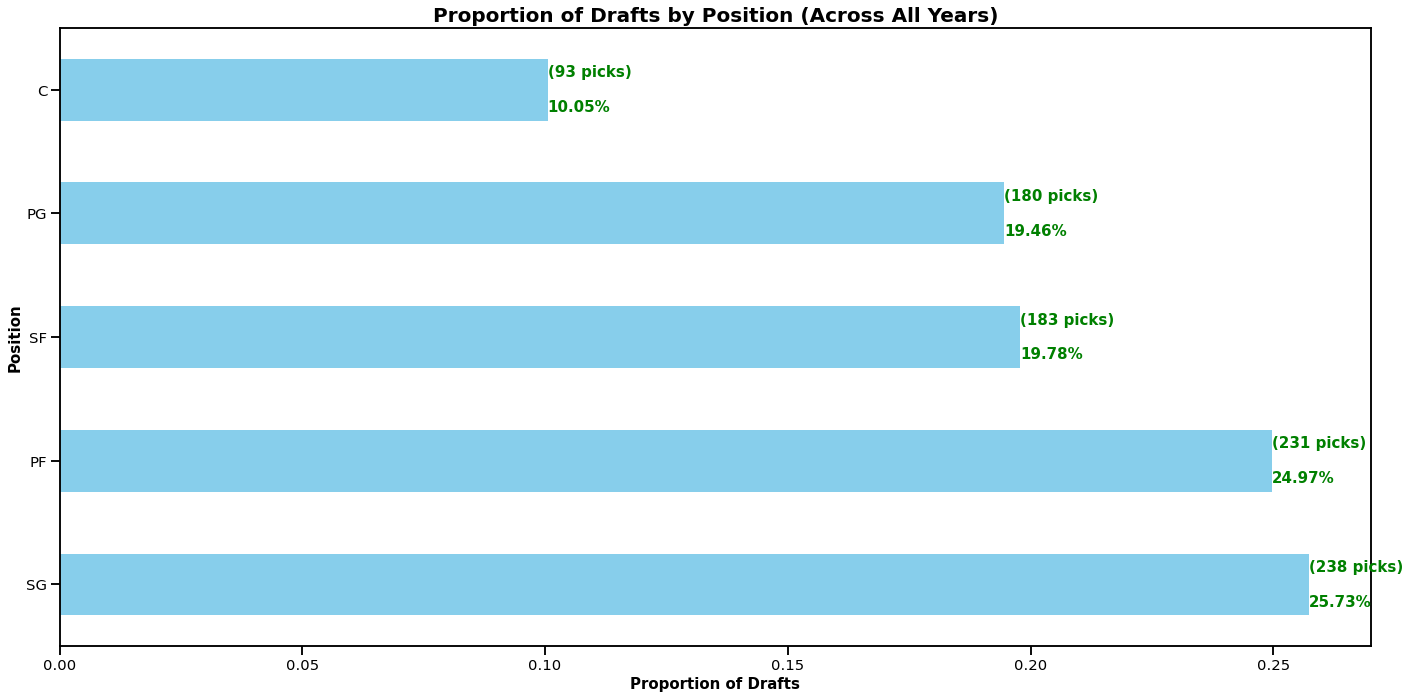

In [22]:
position_counts = draft_data['position'].value_counts()
total_drafts = position_counts.sum()
position_proportions = position_counts / total_drafts

plt.figure(figsize=(20, 10))
position_proportions.plot(kind='barh', color='skyblue')

plt.title('Proportion of Drafts by Position (Across All Years)', fontsize=20, fontweight='bold')
plt.xlabel('Proportion of Drafts', fontsize=15, fontweight='bold')
plt.ylabel('Position', fontsize=15, fontweight='bold')

for index, (position, proportion) in enumerate(position_proportions.items()):
    count = position_counts[position]
    plt.text(proportion, index, f'({count} picks)\n\n{proportion:.2%}', ha='left', va='center', fontsize=15, fontweight='bold', color='green')

plt.tight_layout()
plt.show()

 It is clear from the above graph that `SG` and `PF` are the most drafted positions across the years. The least drafted position is `C` and we will see why this is the case when we look at drafts in more detail :

Lets look at the positional distribution of drafts over time by looking at the number of players drafted in each position (SG, PG, PF, SF, C) for each year. This will give us insights into any long-term trends or shifts in positional preferences over time

In [23]:
# Grouping the data by season and position and counting the number of draft picks for each position in each year
positional_distribution = draft_data.groupby(['season', 'position']).size().unstack(fill_value=0)
positional_distribution

position,C,PF,PG,SF,SG
season,,,,,
2000,3,4,6,3,7
2001,9,8,6,10,4
2002,2,15,5,9,3
2003,2,9,6,7,6
2004,3,6,12,3,10
2005,2,15,7,8,5
2006,3,8,5,7,7
2007,3,10,7,10,7
2008,4,7,6,5,7


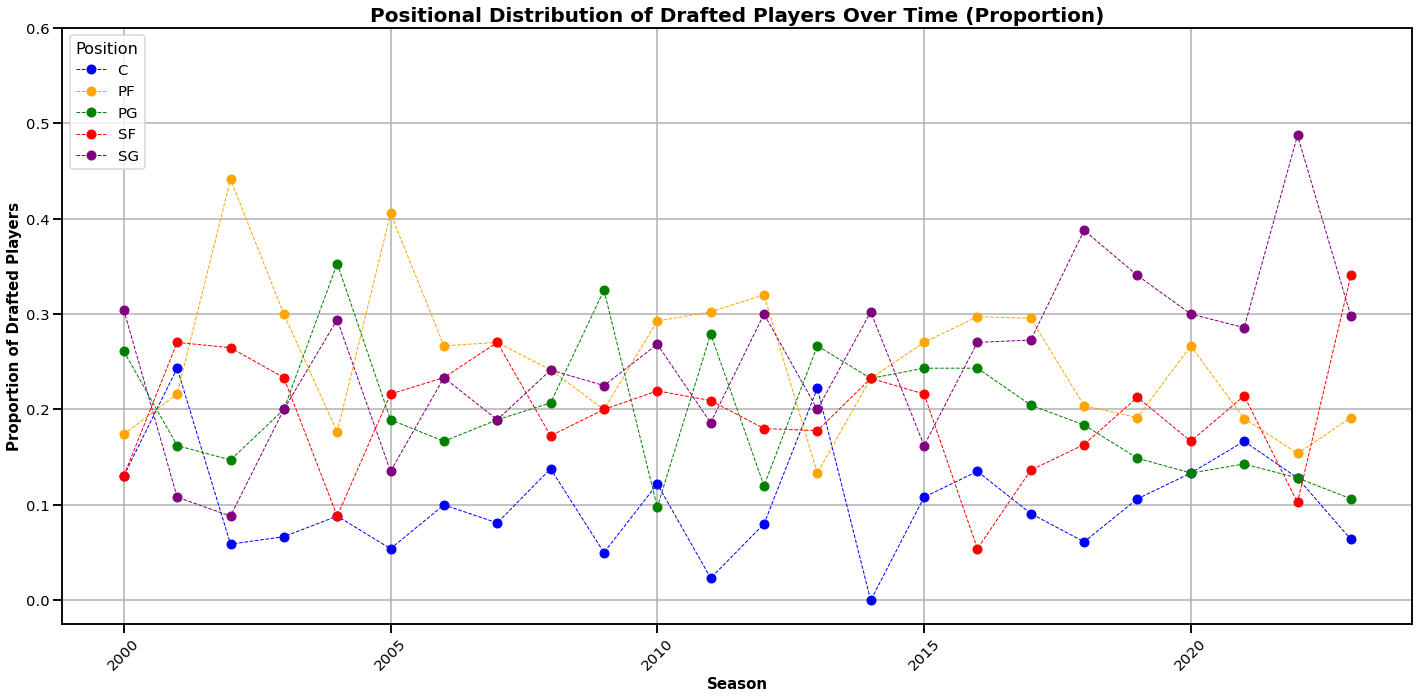

In [24]:
total_players_per_year = positional_distribution.sum(axis=1)

# Calculate the proportion of drafts that came from each position in each year
proportional_distribution = positional_distribution.div(total_players_per_year, axis=0)

plt.figure(figsize=(20, 10))
positions = positional_distribution.columns
colors = ['blue', 'orange', 'green', 'red', 'purple'] 

for i, position in enumerate(positions):
    plt.plot(proportional_distribution.index, proportional_distribution[position], label=position, color=colors[i], marker='o', linestyle='--', linewidth = 1)

plt.title('Positional Distribution of Drafted Players Over Time (Proportion)', fontsize=20, fontweight='bold')
plt.xlabel('Season', fontsize=15, fontweight='bold')
plt.ylabel('Proportion of Drafted Players', fontsize=15, fontweight='bold')
plt.legend(title='Position', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 0.7, 0.1)) 
plt.tight_layout()
plt.show()

From the graph above it is evident there isnt any particular position that has been consistently popular across the years. However, we can see for most years, `Centre` position players are drafted the least which gives us an indication that the position may not be a very popular choice for teams when they're looking to draft new players. 

There could be multiple reasons for this :

 - <ins> Ever changing play styles </ins> : Modern NBA play styles increasingly emphasize versatility and perimeter shooting, favoring  players who can comfortably play multiple positions. Traditional "Centre" position players may be perceived as less versatile and less suited to the fast-paced, perimeter-oriented style of play prevalent in today's NBA.

 - <ins>Injury Concerns and Durability</ins> : "Centre" position players often face greater physical demands and are more susceptible to injuries due to their size and the physical nature of their position.
 NBA teams may be more cautious when drafting "Centre" position players, particularly those with injury histories, leading to fewer draft selections.

 - There could be many other reasons why this is the case such as team strategy, preferred skillsets for teams etc


If we just look at the past few years `SG` position players have been drafted the most, mainly because of their ability to make shots consistently from anywhere on the court and being able to set their teammates up for plays. However, all we can do is speculate since it all boils down to the teams's needs and what position players they lack in their squad. 


Lets now see how the drafted players (grouped by position) tend to perform in their first year. We will use "points_per_game" as a metric to compare different position players and visualize the distribution of this metric among players drafted at each position, highlighting any differences or patterns

In [25]:
merged_data = pd.merge(draft_data, player_stats[['player_id', 'season', 'points', 'games_played', 'minutes_played']], on='player_id', how='left')
merged_data.dropna(subset=['season_x', 'season_y'], inplace=True)

merged_data['draft_year'] = merged_data['season_x'].astype(int)
merged_data['stats_year'] = merged_data['season_y'].str.split('-').str[0]
merged_data['stats_year'] = pd.to_numeric(merged_data['stats_year'], errors='coerce')

# Filter player statistics to include only the data for the season they were drafted
merged_data = merged_data[merged_data['draft_year'] == merged_data['stats_year']]

# Calculate points per game (PPG) for each player for the draft season
merged_data['PPG'] = merged_data['points'] / merged_data['games_played']

In [26]:
merged_data.head(10)

,player_id,player_name,season_x,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_nickname,...,modified_lane_agility_time,three_quarter_sprint,bench_press,season_y,points,games_played,minutes_played,draft_year,stats_year,PPG
0,1641708,Amen Thompson,2023,1,4,4,Draft,1610612745,Houston,Rockets,...,NaN,NaN,NaN,2023-24,499.0,54.0,1157.0,2023,2023,9.240741
1,1641709,Ausar Thompson,2023,1,5,5,Draft,1610612765,Detroit,Pistons,...,NaN,NaN,NaN,2023-24,556.0,63.0,1583.0,2023,2023,8.825397
2,1641710,Anthony Black,2023,1,6,6,Draft,1610612753,Orlando,Magic,...,NaN,3.35,NaN,2023-24,304.0,64.0,1122.0,2023,2023,4.750000
3,1641716,Jarace Walker,2023,1,8,8,Draft,1610612764,Washington,Wizards,...,NaN,3.20,NaN,2023-24,108.0,30.0,315.0,2023,2023,3.600000
4,1641707,Taylor Hendricks,2023,1,9,9,Draft,1610612762,Utah,Jazz,...,NaN,3.32,NaN,2023-24,210.0,32.0,658.0,2023,2023,6.562500
5,1641717,Cason Wallace,2023,1,10,10,Draft,1610612742,Dallas,Mavericks,...,NaN,3.34,NaN,2023-24,504.0,73.0,1512.0,2023,2023,6.904110
6,1641711,Gradey Dick,2023,1,13,13,Draft,1610612761,Toronto,Raptors,...,2.98,3.50,NaN,2023-24,399.0,52.0,1027.0,2023,2023,7.673077
7,1641722,Jordan Hawkins,2023,1,14,14,Draft,1610612740,New Orleans,Pelicans,...,NaN,NaN,NaN,2023-24,515.0,62.0,1118.0,2023,2023,8.306452
8,1641723,Kobe Bufkin,2023,1,15,15,Draft,1610612737,Atlanta,Hawks,...,NaN,3.26,NaN,2023-24,33.0,9.0,89.0,2023,2023,3.666667
9,1641720,Jalen Hood-Schifino,2023,1,17,17,Draft,1610612747,Los Angeles,Lakers,...,NaN,NaN,NaN,2023-24,34.0,21.0,109.0,2023,2023,1.619048


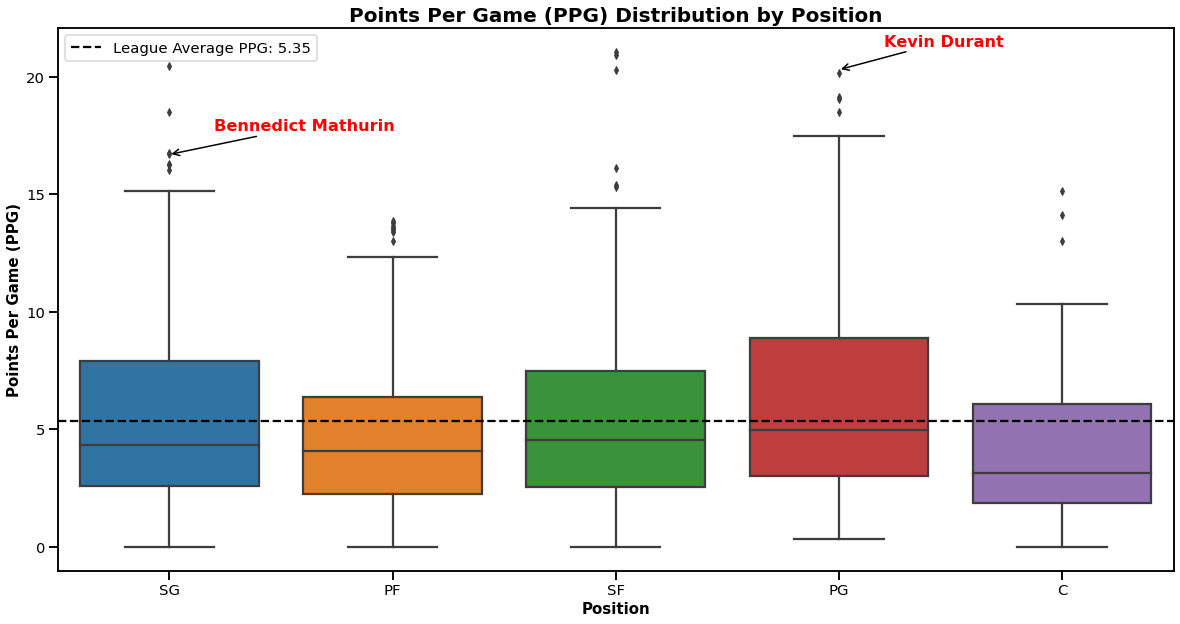

In [28]:
position_mapping = {position: i for i, position in enumerate(merged_data['position'].unique())}

# Calculate league average PPG
league_avg_ppg = merged_data['PPG'].mean()

plt.figure(figsize=(20, 10))
sns.boxplot(x='position', y='PPG', data=merged_data, order=merged_data['position'].value_counts().index)

plt.axhline(league_avg_ppg, color='black', linestyle='--', label=f'League Average PPG: {league_avg_ppg:.2f}')

plt.title('Points Per Game (PPG) Distribution by Position', fontsize=20, fontweight='bold')
plt.xlabel('Position', fontsize=15, fontweight='bold')
plt.ylabel('Points Per Game (PPG)', fontsize=15, fontweight='bold')
plt.legend(loc = 'upper left')

# Identify and annotate one outlier from each position
sg_outlier = merged_data[(merged_data['PPG'] > merged_data['PPG'].quantile(0.95)) & (merged_data['position'] == 'SG')].iloc[0]
sf_outlier = merged_data[(merged_data['PPG'] > merged_data['PPG'].quantile(0.95)) & (merged_data['position'] == 'SF')].iloc[3]

# Add arrows pointing from the data points to the text annotations
plt.annotate(sg_outlier['player_name'], xy=(position_mapping[sg_outlier['position']], sg_outlier['PPG']), xytext=(position_mapping[sg_outlier['position']] + 0.2, sg_outlier['PPG'] + 1),
             arrowprops=dict(facecolor='red', arrowstyle='->'), color = 'red', fontweight='bold')
plt.annotate(sf_outlier['player_name'], xy=(position_mapping[sf_outlier['position']], sf_outlier['PPG']), xytext=(position_mapping[sf_outlier['position']] + 0.2, sf_outlier['PPG'] + 1),
             arrowprops=dict(facecolor='red', arrowstyle='->'), color = 'red', fontweight='bold')

plt.show()

We can see that `PG` and `SG` players tend to score more points per game (PPG) than other positions. However it is interesting to see the League Average Points Per Game (PPG) for players in their first year (draft season) is only 5 points. The above graph doesnt take into account the amount of time spent on court by these players which may give us a better understanding as to why the average PPG is so low.

Lets look at this factor in more detail :

On average a team plays 82 games throughout the season so we will simply divide the mean minutes played by 82 to get the average minutes played per game for players in their first year :

In [29]:
merged_data['minutes_played'].mean()/82

9.760371552313654

As you can see on average a player only spends around 10 minutes on the court which explains why the average league PPG is so low. It'll be interesting to see how many minutes players from each position tend to spend on the court as this might affect the amount of points scored during the season :

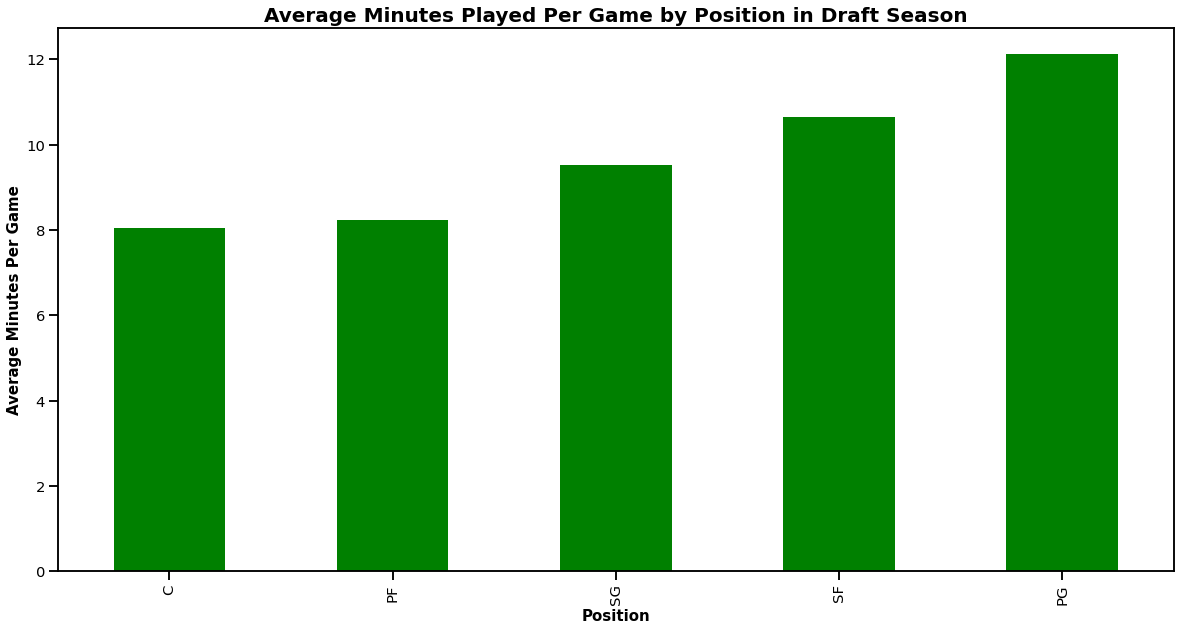

In [30]:
games_in_season = 82

# Calculate the average minutes played per game for each player
merged_data['minutes_per_game'] = merged_data['minutes_played'] / games_in_season

# Group data by position and calculate the average minutes played per game
average_minutes_per_game = merged_data.groupby('position')['minutes_per_game'].mean().sort_values()

plt.figure(figsize=(20, 10))
average_minutes_per_game.plot(kind='bar', color='green')

plt.title('Average Minutes Played Per Game by Position in Draft Season', fontsize=20, fontweight='bold')
plt.xlabel('Position', fontsize=15, fontweight='bold')
plt.ylabel('Average Minutes Per Game', fontsize=15, fontweight='bold')
plt.show()

The graph above shows that on average `PG` position players tend to spend more time on the court per game than other positions (followed by `SF`). We can now normalise the points based on minutes played per game (points per minute) to see what position players on average tend to score more per minute thereby, contributing more to the team :

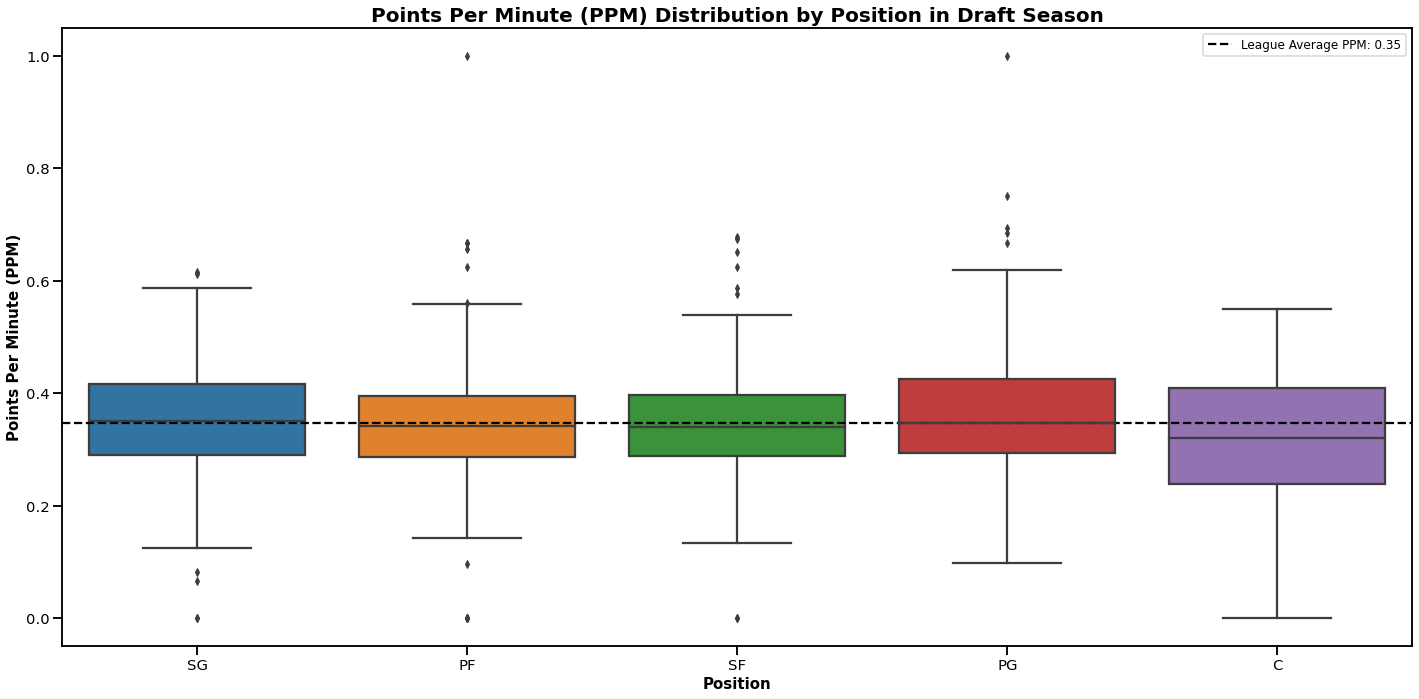

In [31]:
# Calculate points per minute for each player
merged_data['points_per_minute'] = merged_data['points'] / merged_data['minutes_played']

league_avg_ppm = merged_data['points_per_minute'].mean()
grouped_data = merged_data.groupby('position')

plt.figure(figsize=(20, 10))
sns.boxplot(x='position', y='points_per_minute', data=merged_data, order=merged_data['position'].value_counts().index)
plt.axhline(league_avg_ppm, color='black', linestyle='--', label=f'League Average PPM: {league_avg_ppm:.2f}')
plt.title('Points Per Minute (PPM) Distribution by Position in Draft Season', fontsize=20, fontweight='bold')
plt.xlabel('Position', fontsize=15, fontweight='bold')
plt.ylabel('Points Per Minute (PPM)', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show() 

Similar results (to the previous boxplot) can be seen here too where on average `PG` and `SG` players tend to have the highest PPM value than other position players (although `PF` and `SF` aren't too far off). From the graph it is also evident that `C` position players have the lowest PPM which was also the case when we looked at PPG for each position.

Before concluding our analysis on drafts, we will look at the correlation between players drafted and some of their attributes (such as height, weight and wingspan)

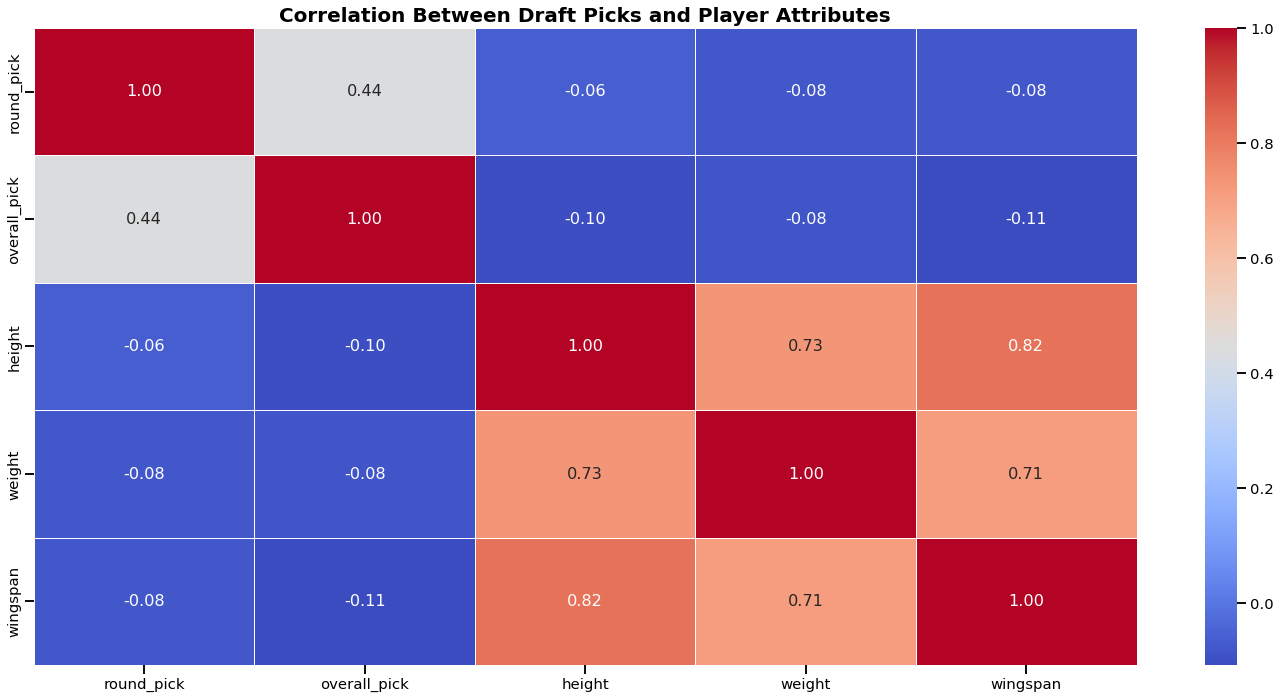

In [32]:
selected_columns = ['round_pick', 'overall_pick', 'height', 'weight', 'wingspan']
draft_data_filtered = draft_data[selected_columns].dropna()

correlation_matrix = draft_data_filtered.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Draft Picks and Player Attributes', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

As expected height, weight and wingspan are strongly correlated. However, surprisingly there actually isnt a significant correlation between the three main physical attributes and draft picks. One possible reason for this could be that NBA teams place greater emphasis on a player's basketball skills, athleticism, shooting ability and overall basketball IQ rather than purely focusing on physical measurements like height, weight, and wingspan. While these attributes are important, they are not the sole determinants of success in the NBA, with teams prioritizing players who demonstrate superior on-court abilities and potential for growth 


# Conclusion for Drafts

  Here are our conclusions after analysing the above factors with respect to drafts :

  1. <ins> Colleges </ins> :
  
     -  We initially thought, after looking at the top 10 colleges with the most drafts (overall, across the seasons) that there would be a few colleges with the highest proportion of draft picks. However, when we looked at the year on year trend of colleges with the highest draft proportion there wasn't any particular college which seemed to be more popular than the others for drafting players as for most of the years a different college had the highest number of draft picks. 

     - So is it fair to conclude that colleges dont have an impact on drafts at all? No, it's not accurate to say that colleges absolutely don't affect drafts. Instead, we can say that colleges alone may not be sufficient indicators for optimizing draft strategies. For e.g. : if teams focus solely on what colleges to draft players from, they might overlook other crucial factors in player evaluation, such as individual player skills, athleticism, character, and potential fit within a team's system. Therefore, teams' approach should incorporate multiple sources of talent identification and evaluation to make informed draft selections and optimize long-term team success.
     


2. <ins> Positions </ins> : 

    - When we looked at the proportion of drafts by position, it was clearly evident that `Centres(C)` were least drafted whereas 50% of the total drafts came from `Shooting Guards(SG)` and `Power Forwards(PF)` (25% each) meaning they were the most popular positions that teams looked to draft players from. This was also testified by our analysis on `Points Per Game (PPG)` for players from each position where we saw that `Centres` tend to score the least. However, `Point Guards` had the highest `PPG` while only being the 3rd most drafted position (19% of total drafts). To see why this was the case we normalised the points based on minutes played and came up with a new metric `Points Per Minute(PPM)` which would give us a better undertsanding of how players from each position tend to perform. `Point Guards` again had the highest `PPM` so the question arises, why are they drafted so less? One possible reason for this could be that their primary focus is facilitating offense rather than being the main scorers. Other positions, such as shooting guards and power forwards, may have more scoring-oriented roles, leading to higher draft percentages.


    - Therefore, we can conclude that positions certainly have an impact on draft strategies. The analysis shows that different positions have varying levels of popularity, performance metrics, and on-court impact. By understanding these factors, teams can tailor their draft strategies to prioritize positions that align with their roster needs, playing style, and long-term goals. Positional analysis helps teams identify undervalued talent, maximize on-court efficiency, and build a balanced roster capable of competing at a high level in the NBA.

  

3. <ins> Physical Player Attributes </ins> :

    - As we saw above, there was barely any correlation between the main physical player attributes and round/overall pick.

    - Therefore, while physical attributes may be considered during the evaluation process, they do not necessarily dictate a player's draft/round pick 



While our study sheds light on the relationship between certain player attributes/stats and draft picks, it's important to acknowledge that our exploration was limited to a fixed set of features. Several other factors, beyond the scope of this project, could also significantly impact draft decisions. For e.g. leadership, work ethic, and coachability can heavily influence team evaluations. Additionally, contextual factors such as team needs and even external influences like media hype and public perception may play pivotal roles in shaping draft outcomes. Therefore, while our analysis provides valuable insights, it's essential to recognize the complexity of draft decision-making and the amount of factors that teams consider when drafting players

## We will now look at factors impacting trades the most

Lets first load the trade dataset :

In [33]:
trade_data = pd.read_csv('../data/cleaned/trade_data/trade_data.csv')
trade_data.head(10) 

,player_id,player_name,trade_year,team_traded_from,team_traded_to
0,920,A.C. Green,1993-94,Los Angeles Lakers,Phoenix Suns
1,920,A.C. Green,1996-97,Phoenix Suns,Dallas Mavericks
2,920,A.C. Green,1999-00,Dallas Mavericks,Los Angeles Lakers
3,920,A.C. Green,2000-01,Los Angeles Lakers,Miami Heat
4,2062,A.J. Guyton,2002-03,Chicago Bulls,Golden State Warriors
5,1630639,A.J. Lawson,2022-23,Minnesota Timberwolves,Dallas Mavericks
6,201985,AJ Price,2012-13,Indiana Pacers,Washington Wizards
7,201985,AJ Price,2013-14,Washington Wizards,Minnesota Timberwolves
8,201985,AJ Price,2014-15,Minnesota Timberwolves,Indiana Pacers
9,201985,AJ Price,2014-15,Indiana Pacers,Cleveland Cavaliers


We have trade data going all the way back to the 1993 season. To keep this consistent with our other datasets, we will consider rows after the 1999-2000 season :

In [34]:
trade_data = trade_data[trade_data['trade_year'] >= '2000']

In [35]:
trade_data

,player_id,player_name,trade_year,team_traded_from,team_traded_to
3,920,A.C. Green,2000-01,Los Angeles Lakers,Miami Heat
4,2062,A.J. Guyton,2002-03,Chicago Bulls,Golden State Warriors
5,1630639,A.J. Lawson,2022-23,Minnesota Timberwolves,Dallas Mavericks
6,201985,AJ Price,2012-13,Indiana Pacers,Washington Wizards
7,201985,AJ Price,2013-14,Washington Wizards,Minnesota Timberwolves
...,...,...,...,...,...
7697,1985,Zendon Hamilton,2005-06,Milwaukee Bucks,Cleveland Cavaliers
7698,1985,Zendon Hamilton,2005-06,Cleveland Cavaliers,Philadelphia 76ers
7699,204054,Zoran Dragic,2014-15,Phoenix Suns,Miami Heat
7700,980,Zydrunas Ilgauskas,2010-11,Cleveland Cavaliers,Miami Heat


Lets first look at the number of trades that have happened over the years :

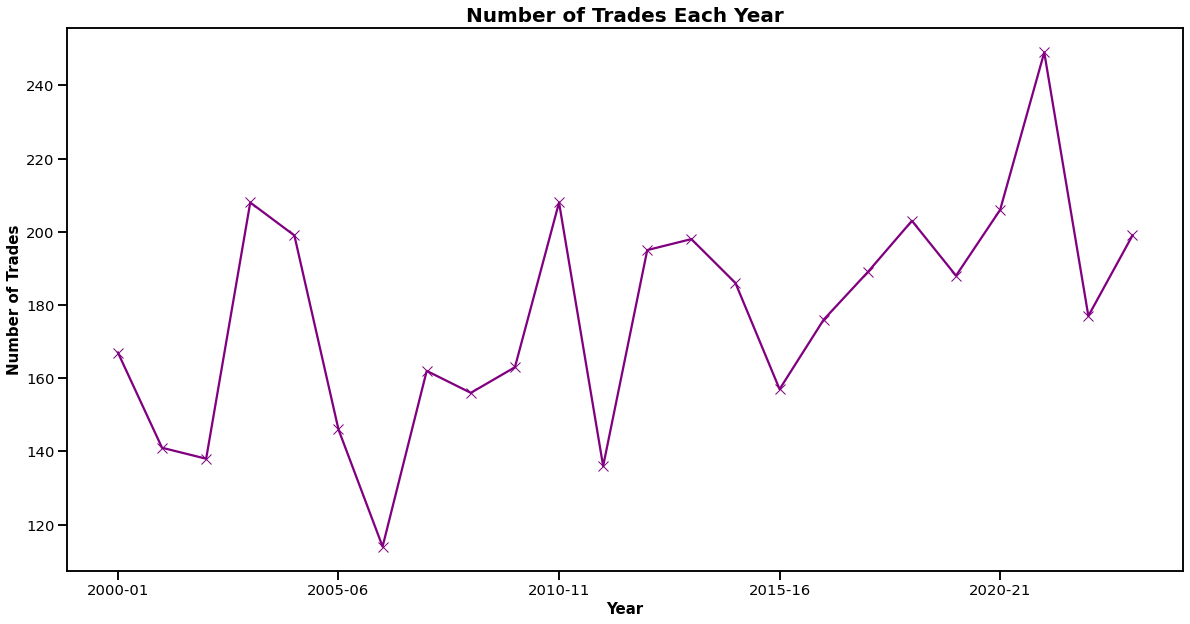

In [36]:
trades_per_year = trade_data['trade_year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))
trades_per_year.plot(kind='line', color='purple', marker = 'x', markersize=10)
plt.title('Number of Trades Each Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Number of Trades', fontsize=15, fontweight='bold')
plt.show()

In [39]:
trades_per_team = trade_data.groupby(['trade_year', 'team_traded_to']).size().unstack(fill_value=0)
trades_per_team.head(10)

team_traded_to,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,...,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards
trade_year,,,,,,,,,,,,,,,,,,,,,
2000-01,8,5,5,7,2,10,8,8,8,12,...,3,7,7,5,4,2,3,8,3,9
2001-02,7,2,6,6,6,6,11,9,4,2,...,4,4,8,9,5,3,7,3,2,2
2002-03,8,9,2,0,3,3,4,10,5,3,...,7,6,10,3,3,3,5,8,4,6
2003-04,11,9,6,0,8,10,7,6,6,12,...,2,8,4,7,8,4,8,15,6,5
2004-05,12,2,10,14,5,7,7,7,5,8,...,2,8,7,8,3,9,7,5,5,5
2005-06,4,3,7,3,6,8,2,5,3,0,...,5,6,4,9,4,7,2,3,3,5
2006-07,6,2,3,3,4,3,5,6,3,7,...,1,0,4,3,7,2,6,7,2,2
2007-08,2,7,10,2,5,8,8,7,5,3,...,10,4,3,5,3,7,7,5,2,1
2008-09,2,3,5,8,6,3,4,8,2,5,...,6,4,3,7,3,7,6,9,1,3


Above is just a table of the number of trades that happened in each team across the years. It will be interesting to see how many of these trades were actually beneficial for teams. For this, we can use the normalised metric of PPM (points per minute) of the player before and after they were traded and even PPG (points per game) of the respective team which will tell us if the teams performance improved or not

Since we have a vast amount of data on trades for over 20 years, lets look at the past 4 years and observe any patterns that emerge in trades being successful : 

In [40]:
player_stats['points_per_minute'] = player_stats['points'] / player_stats['minutes_played']

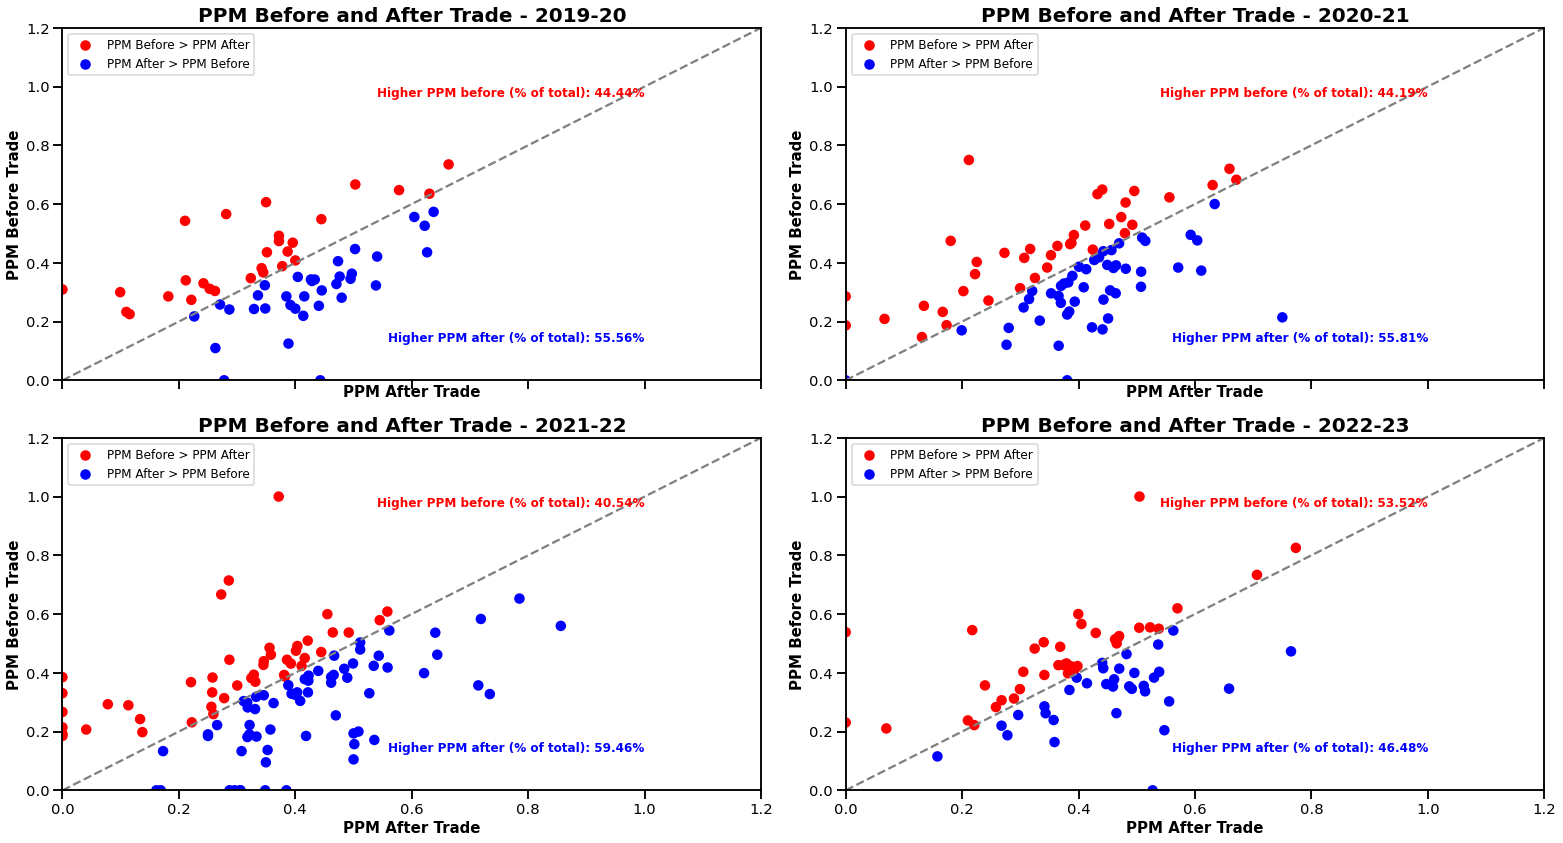

In [41]:
current_season = '2023-24'  
past_seasons = [f"{int(current_season[:4]) - i}-{int(current_season[-2:]) - i}" for i in range(1, 5)]
trade_data_past_5_seasons = trade_data[trade_data['trade_year'].isin(past_seasons)]

past_seasons.sort()
all_ppm_before_trade = []
all_ppm_after_trade = []

n_seasons = len(past_seasons)
n_cols = 2  
n_rows = n_seasons // n_cols + (n_seasons % n_cols > 0)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(22, 12), sharex=True)

for idx, season in enumerate(past_seasons):
    
    i = idx // n_cols
    j = idx % n_cols

        
    trade_data_season = trade_data_past_5_seasons[trade_data_past_5_seasons['trade_year'] == season]
    ppm_before_trade = []
    ppm_after_trade = []
    for index, trade in trade_data_season.iterrows():
        player_id = trade['player_id']
        team_from = trade['team_traded_from']
        team_to = trade['team_traded_to']
    
        
        year = int(season[:4])
        
        ppm_before = player_stats[(player_stats['player_id'] == player_id) & 
                                     (player_stats['season'] == season) & 
                                     (player_stats['team_name'] == team_from)]['points_per_minute'].values
    
        ppm_after = player_stats[(player_stats['player_id'] == player_id) & 
                                    (player_stats['season'] == season) & 
                                    (player_stats['team_name'] == team_to)]['points_per_minute'].values
        
    
        if len(ppm_before) > 0 and len(ppm_after) > 0:
            ppm_before_trade.append(ppm_before[0])
            ppm_after_trade.append(ppm_after[0])
            
    all_ppm_before_trade.append(ppm_before_trade)
    all_ppm_after_trade.append(ppm_after_trade)

    # Define colors based on condition: ppm_before > ppm_after or ppm_after > ppm_before
    colors = ['red' if ppm_before > ppm_after else 'blue' for ppm_before, ppm_after in zip(ppm_before_trade, ppm_after_trade)]
    axs[i, j].scatter(ppm_after_trade, ppm_before_trade, color=colors)
    above_line = axs[i, j].scatter([], [], color='red', label='PPM Before > PPM After')
    below_line = axs[i, j].scatter([], [], color='blue', label='PPM After > PPM Before')
    axs[i, j].legend(handles=[above_line, below_line], fontsize=12, loc='upper left')

    axs[i, j].set_xlabel('PPM After Trade', fontsize=15, fontweight='bold')
    axs[i, j].set_ylabel('PPM Before Trade', fontsize=15, fontweight='bold')
    axs[i, j].set_title(f'PPM Before and After Trade - {season}', fontsize=20, fontweight='bold')
    axs[i, j].plot([0, 1.2], [0, 1.2], color='gray', linestyle='--')

    total_points = len(ppm_before_trade)
    above_line_count = sum(ppm_before > ppm_after for ppm_before, ppm_after in zip(ppm_before_trade, ppm_after_trade))
    below_line_count = total_points - above_line_count

    # Annotate the percentages on the graph
    above_line_percentage = (above_line_count / total_points) * 100
    below_line_percentage = (below_line_count / total_points) * 100
    axs[i, j].text(1, 1 ,f"Higher PPM before (% of total): {above_line_percentage:.2f}%", fontsize=12, ha='right', va='top', color = 'red', fontweight='bold')
    axs[i, j].text(1, 0.12,  f"Higher PPM after (% of total): {below_line_percentage:.2f}%", fontsize=12, ha='right', va='bottom', color = 'blue', fontweight='bold')

    # Set the same limits for both axes for all plots
    axs[i, j].set_xlim(0, 1.2)
    axs[i, j].set_ylim(0, 1.2)

plt.tight_layout()
plt.show()

The points above the dotted line represent players who scored less points (ppm) after they were traded and the points below are players who scored more. From this we can derive the number of successful trades each year (where players have a higher ppm after the trade and the team has more wins after the player was traded than before) :

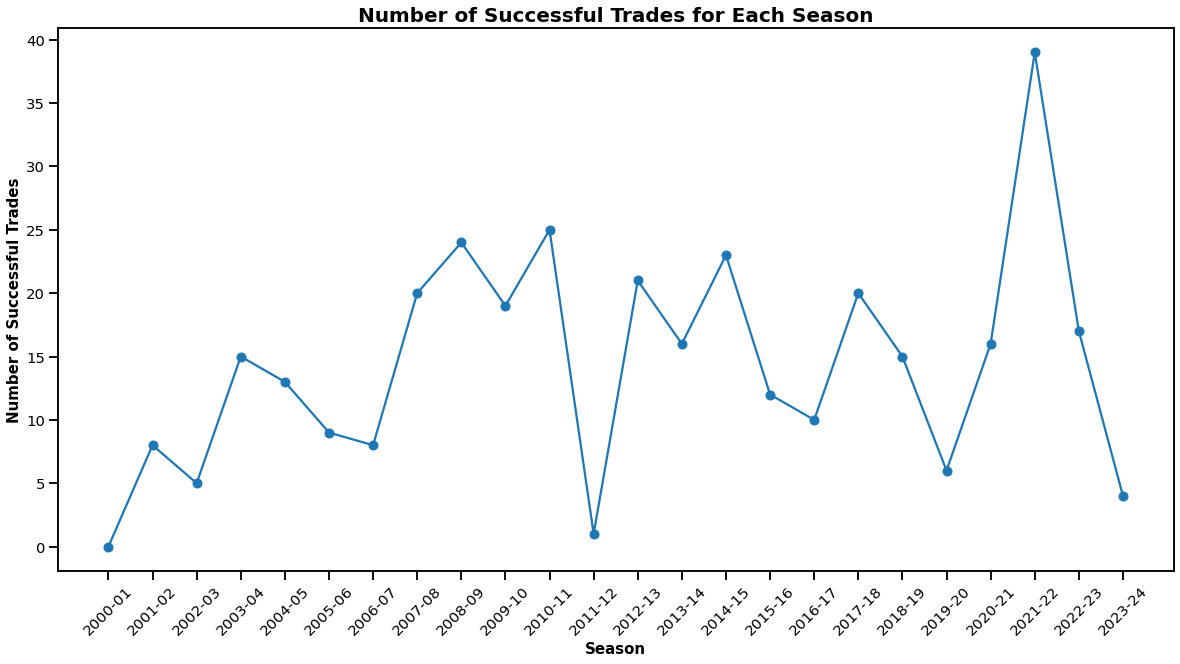

In [42]:
successful_trades_count = {}

for season in trade_data['trade_year'].unique():

    trade_data_season = trade_data[trade_data['trade_year'] == season]
    successful_trades = 0
    
    # Iterate over each trade in the current season
    for index, trade in trade_data_season.iterrows():
        # Extract player and trade details
        player_id = trade['player_id']
        team_from = trade['team_traded_from']
        team_to = trade['team_traded_to']
        
        # Find player's PPM before trade
        ppm_before = player_stats[(player_stats['player_id'] == player_id) & 
                                   (player_stats['season'] == season) & 
                                   (player_stats['team_name'] == team_from)]['points_per_minute'].values
        
        # Find player's PPM after trade
        ppm_after = player_stats[(player_stats['player_id'] == player_id) & 
                                  (player_stats['season'] == season) & 
                                  (player_stats['team_name'] == team_to)]['points_per_minute'].values
        
        
        prev_season = str(int(season[:4]) - 1) + '-' + str(int(season[:4]) % 100).zfill(2)
        season_wins = team_stats[(team_stats['season'] == season) & (team_stats['team_name'] == team_to)]['wins'].values
        prev_season_wins = team_stats[(team_stats['season'] == prev_season) & (team_stats['team_name'] == team_to)]['wins'].values
        
        if len(ppm_before) > 0 and len(ppm_after) > 0 and len(season_wins) > 0 and len(prev_season_wins) > 0:
            if ppm_after[0] > ppm_before[0]  and season_wins[0] > prev_season_wins[0]:
                successful_trades += 1
    successful_trades_count[season] = successful_trades

successful_trades_df = pd.DataFrame(list(successful_trades_count.items()), columns=['Season', 'Successful Trades'])
successful_trades_df = successful_trades_df.sort_values(by='Season')

plt.figure(figsize=(20, 10))
plt.plot(successful_trades_df['Season'], successful_trades_df['Successful Trades'], marker='o', linestyle='-')
plt.title('Number of Successful Trades for Each Season', fontsize=20, fontweight='bold')
plt.xlabel('Season', fontsize=15, fontweight='bold')
plt.ylabel('Number of Successful Trades', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()
            

As we can see there's constant ups and downs in the number of 'beneficial' trades where a couple years even have none. It'll be interesting to see how the `PPM` of a traded player compares to the league average which might have an impact on trade strategies. To do this we will calculate the Z score for every player and plot these values to see how they vary from the average league ppm:

In [43]:
league_mean_ppm = player_stats['points_per_minute'].mean()
league_std_ppm = player_stats['points_per_minute'].std()

# Calculate Z-score for each player's PPM
player_stats['ppm_z_score'] = (player_stats['points_per_minute'] - league_mean_ppm) / league_std_ppm

std_devs_from_mean_before_trade = []

for index, trade in trade_data.iterrows():
    player_id = trade['player_id']
    team_from = trade['team_traded_from']
    team_to = trade['team_traded_to']
    trade_year = trade['trade_year']
    
    ppm_before = player_stats[(player_stats['player_id'] == player_id) & 
                              (player_stats['season'] == trade_year) & 
                              (player_stats['team_name'] == team_from)]['points_per_minute'].values
    
    if len(ppm_before) > 0 and len(ppm_after) > 0:
        std_dev_from_mean_before = (ppm_before[0] - league_mean_ppm) / league_std_ppm
        std_devs_from_mean_before_trade.append(std_dev_from_mean_before)

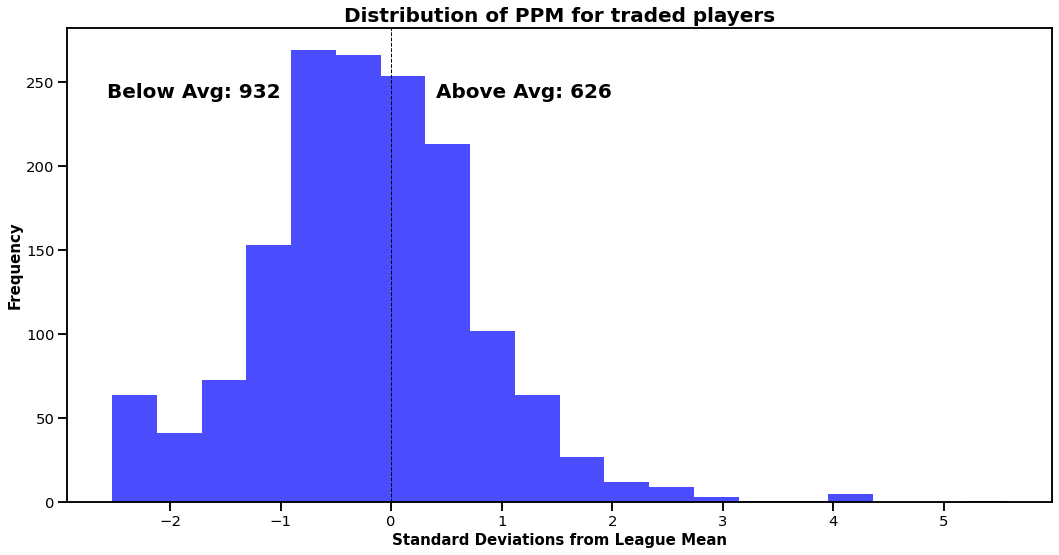

In [44]:
fig, ax =  plt.subplots(figsize=(15, 8))
ax.hist(std_devs_from_mean_before_trade, bins=20, color='blue', alpha=0.7)
ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Standard Deviations from League Mean', fontsize=15, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=15, fontweight='bold')
ax.set_title('Distribution of PPM for traded players', fontsize=20, fontweight='bold')

below_avg_before = sum(std_dev < 0 for std_dev in std_devs_from_mean_before_trade)
above_avg_before = sum(std_dev >= 0 for std_dev in std_devs_from_mean_before_trade)
ax.text(-1, 250, f'Below Avg: {below_avg_before}', fontsize=20, verticalalignment='top', horizontalalignment='right', fontweight='bold')
ax.text(2, 250, f'Above Avg: {above_avg_before}', fontsize=20, verticalalignment='top', horizontalalignment='right', fontweight='bold')
fig.tight_layout()

We would expect most of the trades being players scoring less than the average league ppm but surprisingly this isnt the case as there are a lot of players doing better than the average league performance who end up being traded to a different team. We can see from the graph above that out of all trades 626 of them were players who actually performed better than the average player in the league. There could be various reasons for this :

   - <ins> Team Strategy and Needs </ins>: Teams might prioritize specific skills or playing styles over raw PPM. A player excelling in certain areas may not fit the team's current strategy or positional needs.
    
   - <ins> Salary Cap Considerations </ins>: Financial constraints might force teams to trade high-performing players to manage their salary cap effectively, especially if the player's salary doesn't align with their performance.

   - <ins> Contract Status </ins>: Players performing above average may attract interest from other teams, leading to trade offers that teams find too good to pass up, especially if the player's contract is expiring soon  

it would also be worthwhile to look at how player's ppm compares to their respective team's average ppm (team being traded to) to see the trend of trades. Since it would be impractical to do this for every team , we will look at the top 5 teams in terms of number of trades :

In [45]:
team_season_avg_ppm = player_stats.groupby(['team_name', 'season'])['points_per_minute'].mean().reset_index()

top_5_teams = trade_data['team_traded_to'].value_counts().nlargest(5).index
trade_data_top_5_teams = trade_data[trade_data['team_traded_to'].isin(top_5_teams)]

trades_count_by_team = trade_data_top_5_teams['team_traded_to'].value_counts()

proportions_above_avg = {}
proportions_below_avg = {}


for team in top_5_teams:

    team_avg_ppm = team_season_avg_ppm[team_season_avg_ppm['team_name'] == team]
    team_avg_ppm_std = team_avg_ppm['points_per_minute'].std()
    team_trades = trade_data_top_5_teams[trade_data_top_5_teams['team_traded_to'] == team]

    above_avg_count = 0
    below_avg_count = 0
    
    for index, trade in team_trades.iterrows():
        player_id = trade['player_id']
        trade_year = trade['trade_year']
        
        ppm_before = player_stats[(player_stats['player_id'] == player_id) & 
                                  (player_stats['season'] == trade_year) & 
                                  (player_stats['team_name'] == team)]['points_per_minute'].values
            
        # Check if the player's PPM is available and compare with team's average PPM
        if len(ppm_before) > 0:
            player_ppm = ppm_before[0]
            
            # Calculate the difference in PPM in terms of standard deviations
            diff_std = (player_ppm - team_avg_ppm['points_per_minute'].values[0]) / team_avg_ppm_std

            # Increment counters based on whether player's PPM is above or below team's average PPM
            if diff_std > 0:
                above_avg_count += 1
            else:
                below_avg_count += 1

    # Calculate proportions of players for the current team based on the total number of players traded
    total_players_traded = len(team_trades)
    proportions_above_avg[team] = above_avg_count / total_players_traded
    proportions_below_avg[team] = below_avg_count / total_players_traded
    
    
proportions_above_avg_list = list(proportions_above_avg.values())
proportions_below_avg_list = list(proportions_below_avg.values())
positions = np.arange(len(top_5_teams))

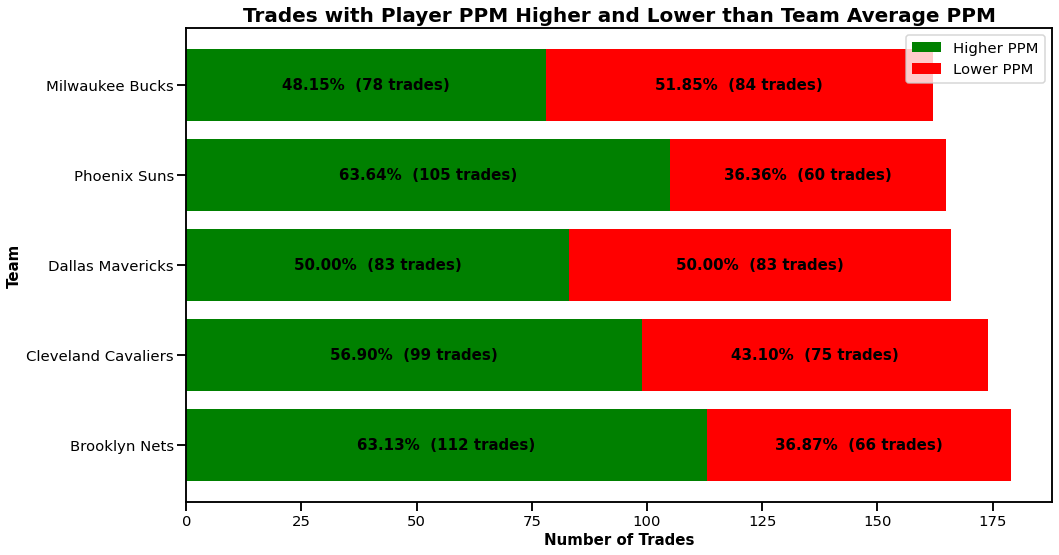

In [46]:
trades_higher_ppm = []
trades_lower_ppm = []

for team in top_5_teams:

    higher_ppm_width = proportions_above_avg_list[top_5_teams.get_loc(team)] * trades_count_by_team[team]
    trades_higher_ppm.append(higher_ppm_width)
    lower_ppm_width = proportions_below_avg_list[top_5_teams.get_loc(team)] * trades_count_by_team[team]
    trades_lower_ppm.append(lower_ppm_width)
    
plt.figure(figsize=(15, 8))
plt.barh(positions, trades_higher_ppm, label='Higher PPM', color='green')
plt.barh(positions, trades_lower_ppm, left=trades_higher_ppm, label='Lower PPM', color='red')

for i in range(len(top_5_teams)):
    
    higher_ppm_percentage = (trades_higher_ppm[i] / (trades_higher_ppm[i] + trades_lower_ppm[i])) * 100
    lower_ppm_percentage = (trades_lower_ppm[i] / (trades_higher_ppm[i] + trades_lower_ppm[i])) * 100
    
    plt.text(trades_higher_ppm[i] / 2, i, f'{higher_ppm_percentage:.2f}%  ({int(trades_higher_ppm[i])} trades)', ha='center', va='center', color='black', fontweight='bold', fontsize = 15)
    plt.text(trades_higher_ppm[i] + trades_lower_ppm[i] / 2, i, f'{lower_ppm_percentage:.2f}%  ({int(trades_lower_ppm[i])} trades)', ha='center', va='center', color='black', fontweight='bold', fontsize = 15)

plt.title('Trades with Player PPM Higher and Lower than Team Average PPM', fontsize = 20, fontweight='bold')
plt.ylabel('Team', fontsize = 15, fontweight='bold')
plt.xlabel('Number of Trades', fontsize = 15, fontweight='bold')
plt.yticks(positions, top_5_teams)
plt.legend()
plt.tight_layout()
plt.show()


From the above we can clearly see that teams tend to accept a lot more trades where the player is performing better than the current team average (PPM) as the proportion of players traded with a higher PPM is in most cases more than that of players with a lower PPM


Before concluding our analysis on trades, we will look at the distribution of trades by position in the last 10 years to see if they a significant impact on them :

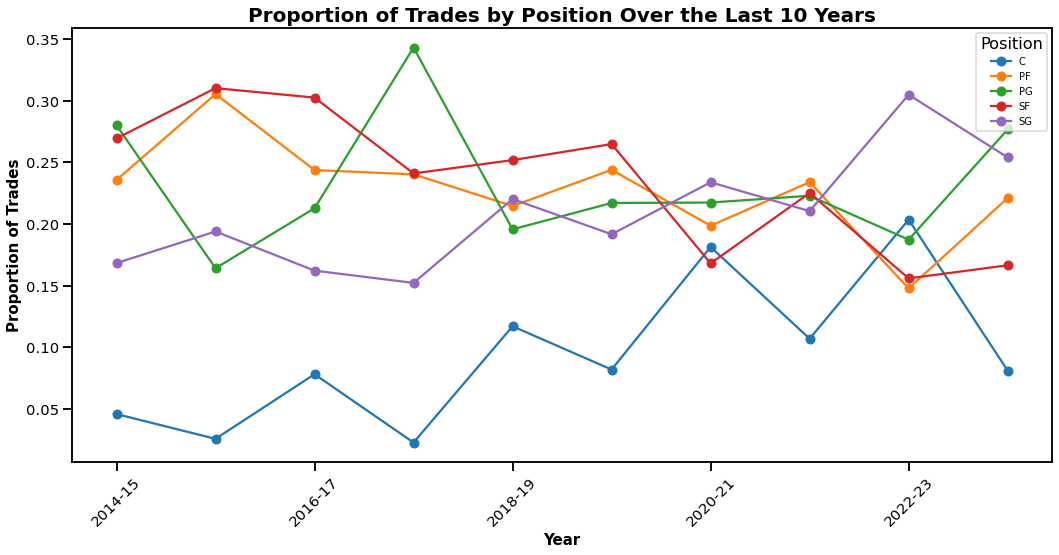

In [51]:
last_10_years_trades = trade_data[trade_data['trade_year'] >= '2014-15']  
merged_data = pd.merge(player_stats, draft_data, on='player_id', how='left')
trades_with_position = pd.merge(last_10_years_trades, merged_data, on='player_id', how='left')

# Group trades by year and position
trades_by_year_position = trades_with_position.groupby(['trade_year', 'position']).size().unstack(fill_value=0)

# Calculate proportions for each position every year
proportions_by_year_position = trades_by_year_position.div(trades_by_year_position.sum(axis=1), axis=0)

proportions_by_year_position.plot(kind='line', marker='o', figsize=(15, 8))
plt.title('Proportion of Trades by Position Over the Last 10 Years', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15, fontweight='bold')
plt.ylabel('Proportion of Trades', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Position', loc='upper right', fontsize = 10)
plt.tight_layout()
plt.show()

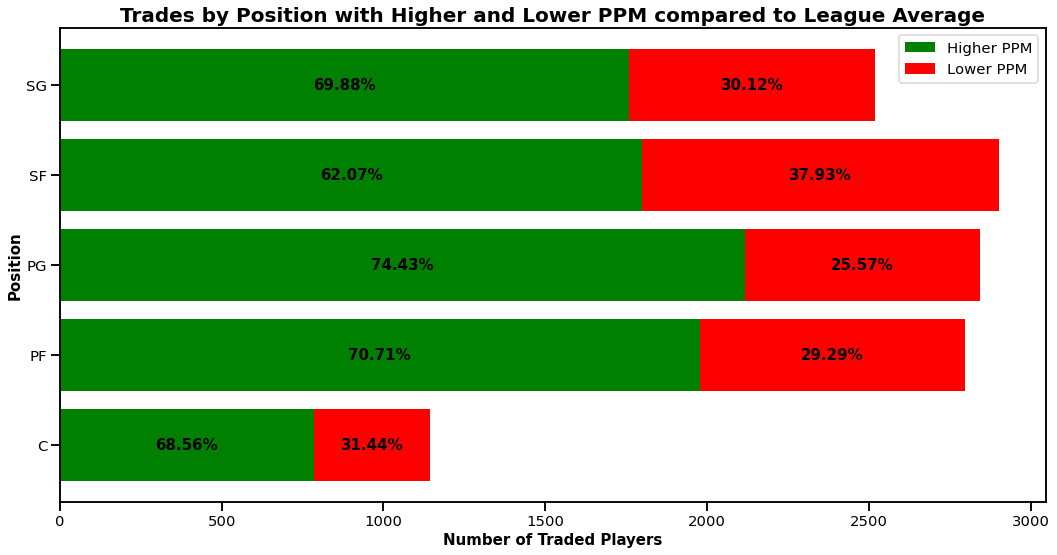

In [52]:
traded_players_by_position = trades_with_position.groupby('position').agg(
    higher_ppm_count=('points_per_minute', lambda x: (x > league_avg_ppm).sum()),
    lower_ppm_count=('points_per_minute', lambda x: (x <= league_avg_ppm).sum())
)

traded_players_by_position['total_players'] = traded_players_by_position['higher_ppm_count'] + traded_players_by_position['lower_ppm_count']

# Calculate percentages for higher PPM and lower PPM
higher_ppm_percentage = (traded_players_by_position['higher_ppm_count'] / traded_players_by_position['total_players']) * 100
lower_ppm_percentage = (traded_players_by_position['lower_ppm_count'] / traded_players_by_position['total_players']) * 100

positions = traded_players_by_position.index
positions_range = np.arange(len(positions))

plt.figure(figsize=(15, 8))

plt.barh(positions_range, traded_players_by_position['higher_ppm_count'], label='Higher PPM', color='green')
plt.barh(positions_range, traded_players_by_position['lower_ppm_count'], left=traded_players_by_position['higher_ppm_count'], label='Lower PPM', color='red')
plt.title('Trades by Position with Higher and Lower PPM compared to League Average', fontsize=20, fontweight='bold')
plt.xlabel('Number of Traded Players', fontsize=15, fontweight='bold')
plt.ylabel('Position', fontsize=15, fontweight='bold')

# Annotate bars with percentages
for i, (higher, lower) in enumerate(zip(higher_ppm_percentage, lower_ppm_percentage)):
    plt.text(traded_players_by_position['higher_ppm_count'][i] / 2, i, f'{higher:.2f}%', ha='center', va='center', color='black', fontweight='bold', fontsize = 15)
    plt.text(traded_players_by_position['higher_ppm_count'][i] + traded_players_by_position['lower_ppm_count'][i] / 2, i, f'{lower:.2f}%', ha='center', va='center', color='black', fontweight='bold', fontsize = 15)

plt.yticks(positions_range, positions)
plt.legend()
plt.tight_layout()
plt.show()

As you can see from the above, `Centres(C)` tend to be the least traded position overall (and almost every year as well) whereas `SFs` followed by `PGs` are the most traded position. Here are a few plausible explanations as to why this is the case :

  - Specialized Role: Centers often have a specialized role within a team, focusing primarily on rebounding, defending the paint, and scoring close to the basket. Their specific skill set may make them less interchangeable compared to players in other positions.

  - Scarcity of Talent: Skilled Centers are relatively rare compared to other positions. Teams may be less willing to trade away a valuable Center due to the difficulty of finding a suitable replacement.

  - Team Stability: Teams tend to build around their Center, considering them a cornerstone of their roster. Trading a Center may disrupt team chemistry and defensive strategies, causing teams to be more cautious about trading players in this position.


However, there's one thing in common between all positions : Majority of the trades coming from each position are players who have a higher `PPM` than the league average  

## Conclusion for Trades 

Here are our conclusions from the analysis above :


   - <ins> Performance vs. League Average PPM </ins> : Contrary to expectations, a significant proportion of players traded to different teams have a PPM higher than the league average. However, on the flipside it makes sense for teams on the receiving end to accept the trade since the player is performing better than the average person in the league

   - <ins> Performance vs. Team Average PPM </ins> : Our analysis indicates that teams often accept trades where the traded player has a higher PPM than the team's current average which is a quite obvious decision. This suggests that teams are actively seeking to improve their performance by acquiring players who can contribute more efficiently than their existing roster, thereby raising the team's overall performance level. Therefore, a player's performance with regards to the average performance of the team is most certainly a crucial factor when it comes to trades


   - <ins> Player Position </ins> : Our analysis reveals distinct trading patterns based on player positions in the NBA. Centers (C) consistently emerge as the least traded position, while Small Forwards (SFs) and Point Guards (PGs) are the most frequently traded positions. This finding  reflects the differing functions and relative strategic importance given to various positions on teams' rosters. However, despite the differences in number of trades among positions, a common trend across all positions is the prevalence of trades involving players with higher Points Per Minute (PPM) than the league average. This consistent preference suggests that teams prioritize acquiring players who demonstrate above-average efficiency in scoring, regardless of their specific position.

It is important to ackowledge the fact that our analysis (similar to drafts) does not paint the full picture as there are various factors such as injury history, coachability etc that have not been explored which might potentially impact trade strategies for teams.


Other Considerations  :

   - <ins> Team Chemistry </ins> : The concept of team chemistry, defined by the cohesion and synergy among players on the court, is crucial in team sports like basketball. Trades that facilitate the integration of players with history of playing in the same team before or familiarity with their new teammates could potentially result in positive outcomes for the acquiring team. 

   - <ins> Model to predict trade outcomes </ins> : While we initially planned on developing a predictive model for trades, due to the complexity of this idea and time constraints we weren't able to work on it. 